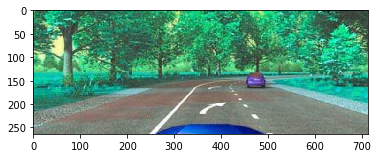

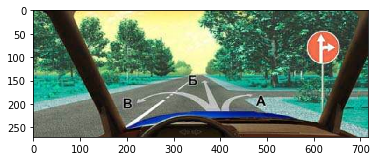

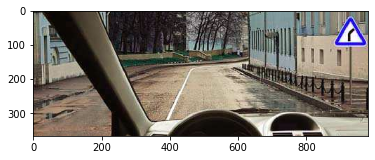

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image 

image1 = cv2.imread('1.png')
image2 = cv2.imread('3.png')
image3 = cv2.imread('4.png')
plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()


## Получим маски

In [3]:
PATH='.'
test_imgs = []
for i in range(1,16):
    test_imgs.append(str(i)+'.png')
test_imgs

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png']

In [4]:
def show(img):
    plt.imshow(img)
    plt.show()

In [5]:
for imga in test_imgs:
    img = cv2.imread(imga)
    #show(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
    lower = np.array([0, 0, 0], np.uint8)
    upper = np.array([360, 50, 150], np.uint8)
    mask = cv2.inRange(hsv, lower, upper)
    #show(mask)

In [6]:
images = [cv2.imread(image) for image in test_imgs]

In [7]:
def contrast_of_img(image1, brightness = -150, contrast = 150):
    img = np.int16(image1)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    #plt.imshow(img)
    #plt.show()
    return cv2.medianBlur(img,5)

In [8]:
beg_contrast_imgs = [contrast_of_img(image) for image in images]
else_contrast_imgs = [contrast_of_img(image, brightness = 150, contrast = 150) for image in beg_contrast_imgs]
contrast_imgs = [contrast_of_img(image, brightness = -30, contrast = 150) for image in else_contrast_imgs]

In [9]:
masks_blue=[]
for img in contrast_imgs:
    #show(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
    lower = np.array([0, 42, 0], np.uint8)
    upper = np.array([179, 255, 255], np.uint8)
    mask = cv2.inRange(hsv, lower, upper)
    masks_blue.append(mask)
    #show(mask)


In [10]:
masks=[]
for img in contrast_imgs:
    #show(img)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV )
    lower = np.array([0, 0, 0], np.uint8)
    upper = np.array([15, 15, 15], np.uint8)
    mask = cv2.inRange(hsv, lower, upper)
    masks.append(mask)
    #show(mask)

In [11]:
ress=[]
for j in range(len(masks)):
    res=[]
    for i in range(len(masks[j])):
        res.append([x+y for x,y in zip(masks[j][i],masks_blue[j][i])])
    ress.append(res)

In [12]:
ims = [Image.fromarray(np.array(img)) for img in ress]

In [13]:
for i in range(len(ims)):
    ims[i].save("file"+str(i)+".png")

In [14]:
converted_ims = []
for i in range(len(ims)):
    image_file = Image.open("file"+str(i)+".png")
    image_file= image_file.convert('L')
    converted_ims.append(image_file)

In [15]:
def proc(image_file):
    original = image_file

    width, height = original.size

    img = original.crop((0, int(height / 2), width, height))

    blur = cv2.GaussianBlur(np.float32(img),(5,5),0)

    gray_filtered = cv2.inRange(blur, 140, 255)
    return gray_filtered

In [16]:
cropped_masks=[]
for im in converted_ims:
    #show(proc(im))
    cropped_masks.append(proc(im))

In [17]:
cropped_masks[0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Получим линии Хафа

In [18]:
PATH='.'
test_imgs = []
for i in range(1,16):
    test_imgs.append(str(i)+'.png')
test_imgs

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png']

In [19]:
images = [cv2.imread(image) for image in test_imgs]

In [20]:
def contrast_of_img(image1, brightness = -150, contrast = 150):
    img = np.int16(image1)
    img = img * (contrast/127+1) - contrast + brightness
    img = np.clip(img, 0, 255)
    img = np.uint8(img)
    #plt.imshow(img)
    #plt.show()
    return cv2.medianBlur(img,5)

In [21]:
beg_contrast_imgs = [contrast_of_img(image) for image in images]

In [22]:
contrast_imgs = [contrast_of_img(image, brightness = 150, contrast = 150) for image in beg_contrast_imgs]

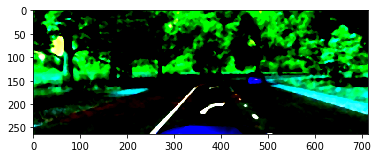

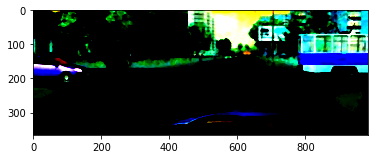

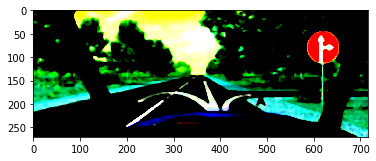

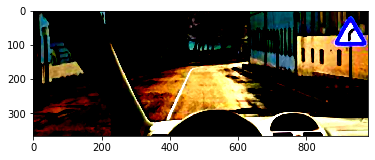

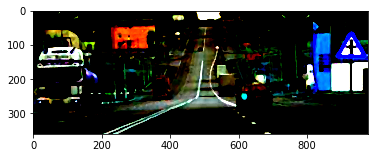

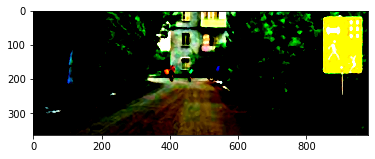

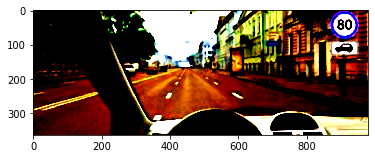

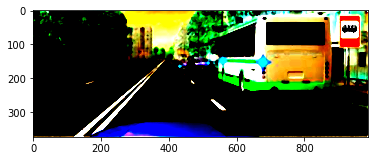

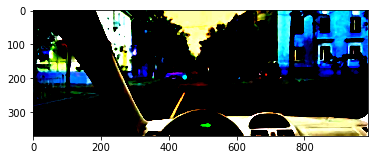

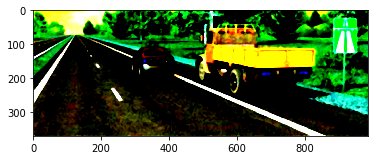

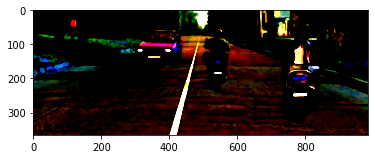

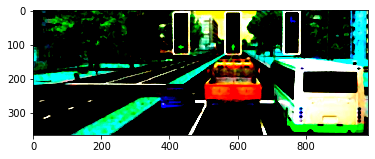

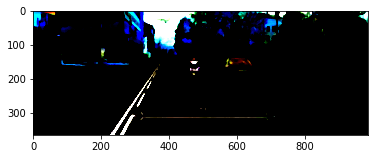

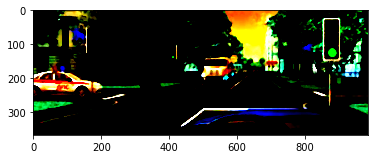

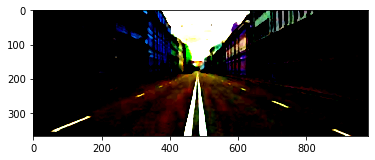

In [23]:
for im in contrast_imgs:
    show(im)

In [24]:
image = contrast_imgs[0]

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [50]:
edged = cv2.Canny(gray, 30, 200) 

In [51]:
contours, hierarchy = cv2.findContours(edged, 

    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

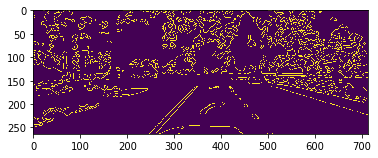

In [53]:
show(edged) 

In [26]:
ims = [Image.fromarray(img) for img in contrast_imgs]
for i in range(len(ims)):
    ims[i].save("file"+str(i)+".png")
converted_ims = []
for i in range(len(ims)):
    image_file = Image.open("file"+str(i)+".png")
    image_file= image_file.convert('L')
    converted_ims.append(image_file)

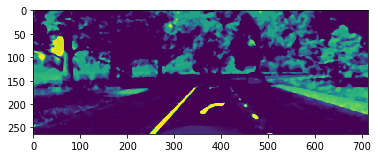

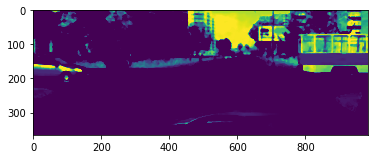

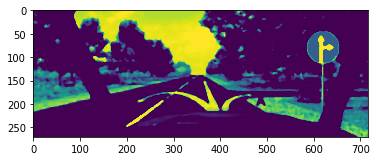

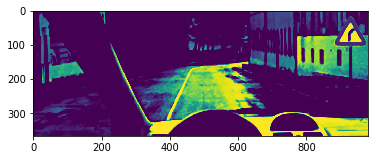

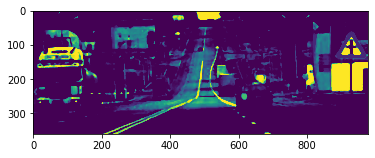

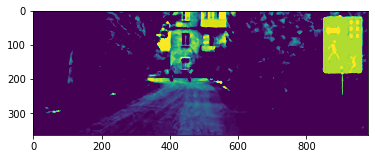

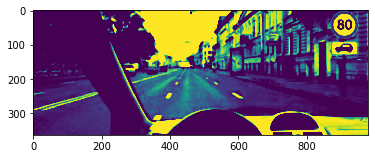

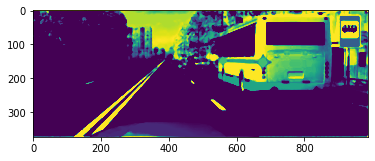

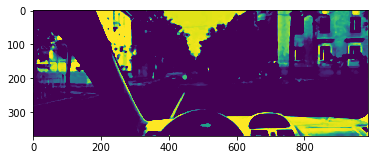

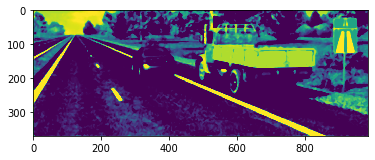

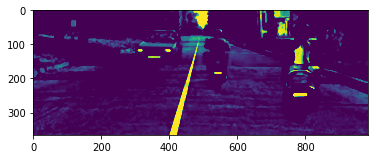

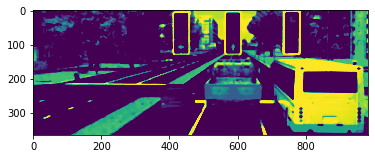

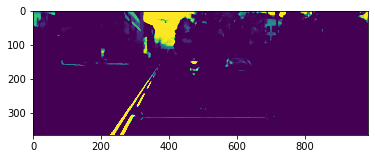

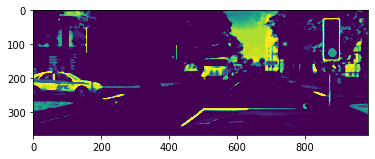

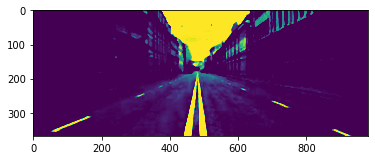

In [32]:
for im in converted_ims:
    show(im)

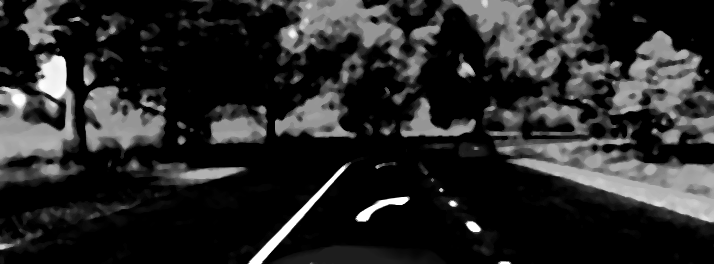

In [44]:
image = converted_ims[0]

In [46]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

error: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = (cv::impl::<unnamed>::SizePolicy)2u; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [26]:
def proc(image_file):
    original = image_file
    width, height = original.size
    img = original.crop((0, int(height / 2), width, height))
    blur = cv2.GaussianBlur(np.float32(img),(5,5),0)
    gray_filtered = cv2.inRange(blur, 140, 255)
    return gray_filtered

In [27]:
cont_imgs = []
for im in converted_ims:
    cont_imgs.append(proc(im))

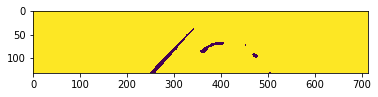

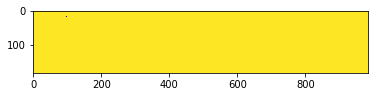

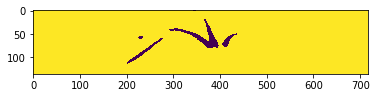

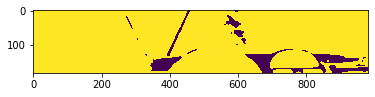

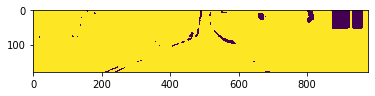

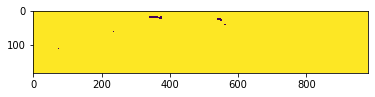

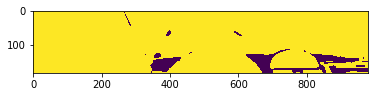

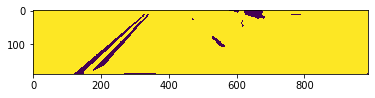

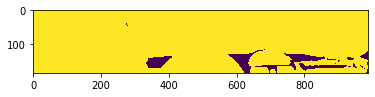

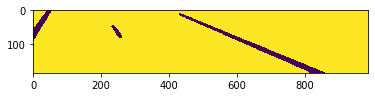

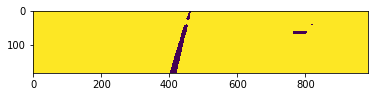

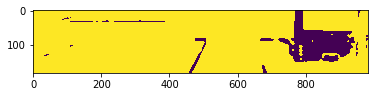

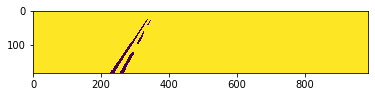

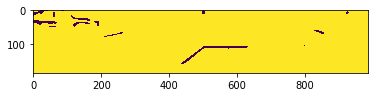

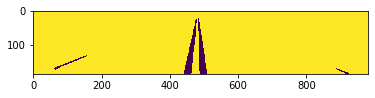

In [28]:
for im in cont_imgs:
    show(im)

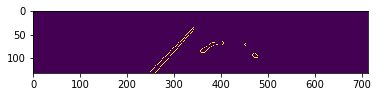

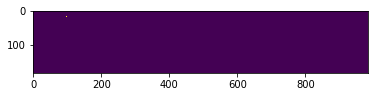

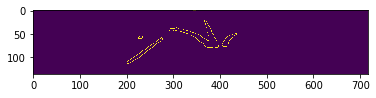

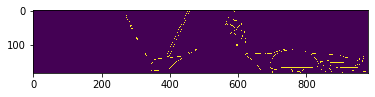

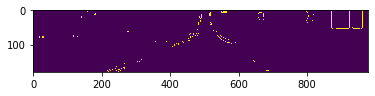

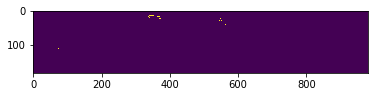

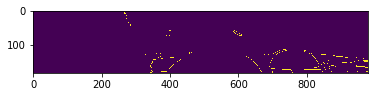

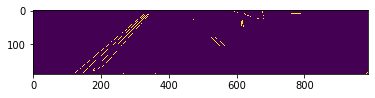

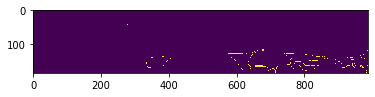

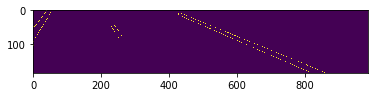

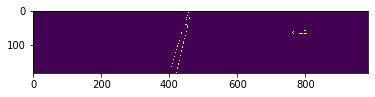

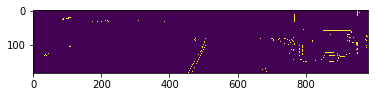

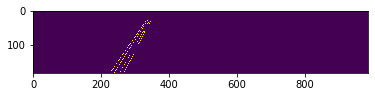

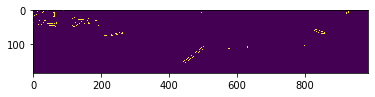

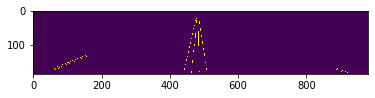

In [29]:
for im in converted_ims:
    edges = cv2.Canny(proc(im), 1000, 1000)
    show(edges)

In [30]:
import cv2
cropped=[]
for test in test_imgs:
    img = cv2.imread(test, 1)
    height, width = img.shape[:2] 
    crop_img = img[int(height / 2):height, 0:width]
    cropped.append(crop_img)

In [31]:
cropped[0].shape

(132, 714, 3)

In [38]:
cropped[0][0][0]

array([ 45, 190, 136], dtype=uint8)

In [39]:
cropped_masks[0].shape

(132, 714)

In [32]:
def on_line(y, x, index, cropped_masks):
    if (abs(cropped_masks[index].shape[1]-x)<3 and abs(cropped_masks[index].shape[0]-y)<3):
        return any([cropped_masks[index][y+i][x+j]==0 for i in range(abs(cropped_masks[index].shape[0]-y)) for j in range(abs(cropped_masks[index].shape[1]-x))])
    if (abs(cropped_masks[index].shape[1]-x)<3):
        return any([cropped_masks[index][y+i][x+j]==0 for i in range(-3,3) for j in range(abs(cropped_masks[index].shape[1]-x))])
    if (abs(cropped_masks[index].shape[0]-y)<3):
        return any([cropped_masks[index][y+i][x+j]==0 for i in range(abs(cropped_masks[index].shape[0]-y)) for j in range(-3,3)])
    return any([cropped_masks[index][y+i][x+j]==0 for i in range(-3,3) for j in range(-3,3)])

In [33]:
import math

In [34]:
def draw_lines(index, converted_ims, cropped):
    edges = cv2.Canny(proc(converted_ims[index]), 1000, 1000)
    img = cropped[index]
    height, width = img.shape[:2] 
    #minLineLength = 10
    #maxLineGap = 5
    minLineLength = 3
    maxLineGap = 2
    lines = cv2.HoughLinesP(edges,3,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    #print(lines)
    x_top_left = width
    y_top_left = height
    sum_top_left = width+height
    
    sum_bot_right = 0
    x_bot_right=0
    y_bot_right=0
    
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if on_line(y1, x1, index, cropped_masks):
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
                if math.sqrt((x2 - x1)**2 + (y2 - y1)**2)>=6:
                    
                    if x1+y1<sum_top_left and y1<=height/2:
                        x_top_left=x1
                        y_top_left=y1
                        sum_top_left=x1+y1
                    if x2+y2<sum_top_left and y2<=height/2:
                        x_top_left=x2
                        y_top_left=y2
                        sum_top_left=x2+y2
                        
                    if x1+y1>sum_bot_right and y1>height/2:
                        x_bot_right=x1
                        y_bot_right=y1
                        sum_bot_right=x1+y1
                    if x2+y2>sum_bot_right and y2>height/2:
                        x_bot_right=x2
                        y_bot_right=y2
                        sum_bot_right=x2+y2
                    
                    
    x_bot_left=0
    y_bot_left=0 
    list_bot_left=[]
                        
    print(x_top_left,y_top_left)
    print(x_bot_right,y_bot_right)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if on_line(y1, x1, index, cropped_masks):
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
                if math.sqrt((x2 - x1)**2 + (y2 - y1)**2)>=6:
                    
                    if x_top_left-x1> 0 and x_top_left-x1<=width/2 and y1>y_top_left:
                        x_bot_left=x1
                        y_bot_left=y1
                        list_bot_left.append((x1,y1))
                        
                    if x_top_left-x2> 0 and x_top_left-x2<=width/2 and y2>y_top_left:
                        x_bot_left=x2
                        y_bot_left=y2
                        list_bot_left.append((x2,y2))
    
    cv2.circle(img, (x_top_left,y_top_left), 5, (0, 0, 255), -1)
    cv2.circle(img, (x_bot_right,y_bot_right), 5, (255, 0, 0), -1)
    list_bot_left.sort(key=lambda x:(-x[1],x[0]))
    print(list_bot_left[0])
    cv2.circle(img, list_bot_left[0], 5, (255, 255, 0), -1)

    return img

In [69]:
def draw_lines(index, converted_ims, cropped):
    edges = cv2.Canny(proc(converted_ims[index]), 1000, 1000)
    img = cropped[index]
    height, width = img.shape[:2] 
    #minLineLength = 10
    #maxLineGap = 5
    minLineLength = 3
    maxLineGap = 2
    lines = cv2.HoughLinesP(edges,3,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    #print(lines)

    sum_top_left = width+height
    points_top_left=[]
    
    sum_bot_right = 0
    points_bot_right=[]
    
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if on_line(y1, x1, index, cropped_masks):
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
                if math.sqrt((x2 - x1)**2 + (y2 - y1)**2)>=4:
                    
                    if x1+y1<sum_top_left:
                        sum_top_left=x1+y1
                        points_top_left.append((x1,y1))
                        
                    if x2+y2<sum_top_left:
                        sum_top_left=x2+y2
                        points_top_left.append((x2,y2))
                        
                    if x1+y1>sum_bot_right:
                        sum_bot_right=x1+y1
                        points_bot_right.append((x1,y1))
                        
                    if x2+y2>sum_bot_right:
                        sum_bot_right=x2+y2
                        points_bot_right.append((x2,y2))
                        
    points_top_left.sort(key=lambda x:(x[1],x[0])) 
    cv2.circle(img, (points_top_left[0][0]-int(points_top_left[0][0]/2),points_top_left[0][1]), 5, (0, 0, 255), -1)
    points_bot_right.sort(key=lambda x:(-x[1], -x[0]))
    cv2.circle(img, (points_bot_right[0][0]+int((width-points_bot_right[0][0])/2),points_bot_right[0][1]), 5, (255, 0, 0), -1)

    points_bot_left=[]
    points_top_right=[]            

    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if on_line(y1, x1, index, cropped_masks):
                cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
                if math.sqrt((x2 - x1)**2 + (y2 - y1)**2)>=6:
                    
                    if points_top_left[0][0]-x1> 0 and points_top_left[0][0]-x1<=width/2 and y1>points_top_left[0][1]:
                        points_bot_left.append((x1,y1))
                        
                    if points_top_left[0][0]-x2> 0 and points_top_left[0][0]-x2<=width/2 and y2>points_top_left[0][1]:
                        points_bot_left.append((x2,y2))
                    
                    if x1 - points_bot_right[0][0]> 0 and x1- points_bot_right[0][0]<=width/2 and y1<points_bot_right[0][1]:
                        points_top_right.append((x1,y1))
                        
                    if x2 - points_bot_right[0][0]> 0 and x2 - points_bot_right[0][0]<=width/2 and y2<points_bot_right[0][1]:
                        points_top_right.append((x2,y2))
                        
    points_top_right.sort(key=lambda x:(x[1],-x[0]))
    #print(points_top_right)
    cv2.circle(img, (points_top_right[0][0]+int((width-points_top_right[0][0])/2),points_top_right[0][1]), 5, (0, 0, 0), -1)

    #cv2.circle(img, (x_top_left,y_top_left), 5, (0, 0, 255), -1)
    #cv2.circle(img, (x_bot_right,y_bot_right), 5, (255, 0, 0), -1)
    points_bot_left.sort(key=lambda x:(-x[1],x[0]))
    #print(list_bot_left[0])
    print(points_top_left[0][1])
    cv2.circle(img, (points_bot_left[0][0]-int(points_bot_left[0][0]/2),points_bot_left[0][1]), 5, (255, 0, 0), -1)
    top_left=(points_top_left[0][0]-int(points_top_left[0][0]/2), points_top_left[0][1])
    top_right=(points_top_right[0][0]+int((width-points_top_right[0][0])/2),points_top_right[0][1])
    bot_left=(points_bot_left[0][0]-int(points_bot_left[0][0]/2),points_bot_left[0][1])
    bot_right=(points_bot_right[0][0]+int((width-points_bot_right[0][0])/2),points_bot_right[0][1])
    
    return img, top_left,top_right,bot_left,bot_right

50


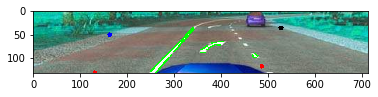

There are no road markings on 1 image


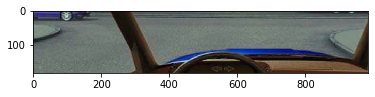

55


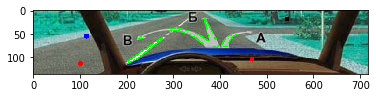

2


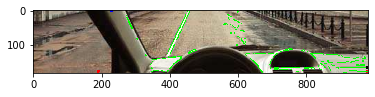

3
There are no road markings on 4 image


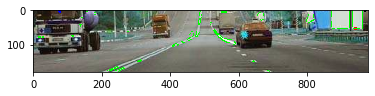

There are no road markings on 5 image


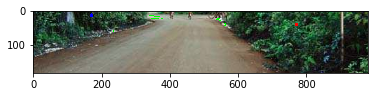

9
There are no road markings on 6 image


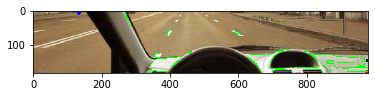

123


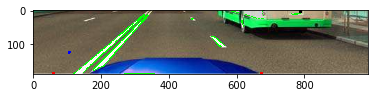

39


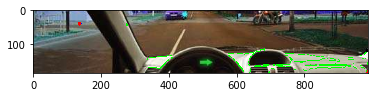

There are no road markings on 9 image


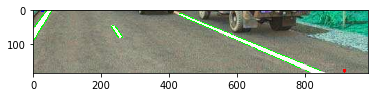

0


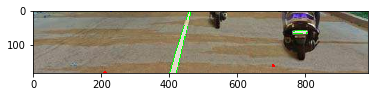

25


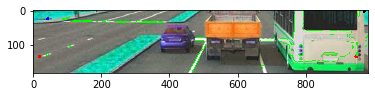

25


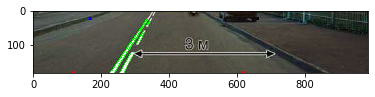

2


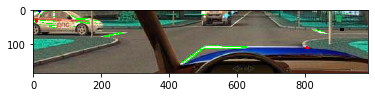

31


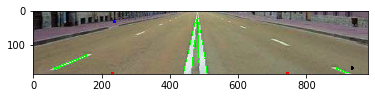

In [70]:
import cv2
cropped=[]
for test in test_imgs:
    img = cv2.imread(test, 1)
    height, width = img.shape[:2] 
    crop_img = img[int(height / 2):height, 0:width]
    cropped.append(crop_img)
for i in range(len(converted_ims)):
    try:
        im,_,_,_,_ = draw_lines(i, converted_ims, cropped)
        show(im)
    except:
        print("There are no road markings on",str(i),"image")
        show(cropped[i])

In [71]:
blacks = []
for i in range(len(cropped)):
    height, width = cropped[0].shape[:2]
    img = Image.new("RGB", (width, height))
    blacks.append(np.int16(img))

50
There are no road markings on 0 image


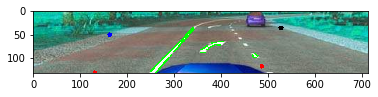

There are no road markings on 1 image


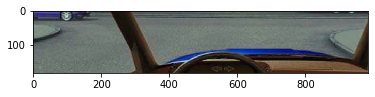

55
There are no road markings on 2 image


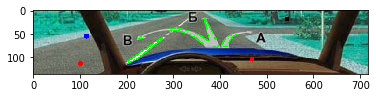

2
There are no road markings on 3 image


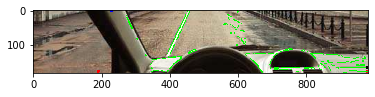

3
There are no road markings on 4 image


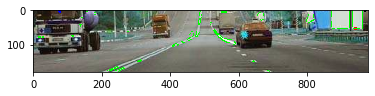

There are no road markings on 5 image


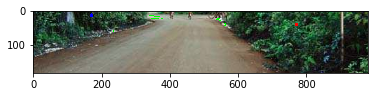

9
There are no road markings on 6 image


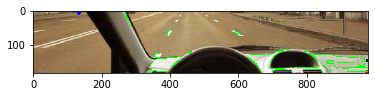

123
There are no road markings on 7 image


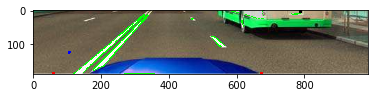

39
There are no road markings on 8 image


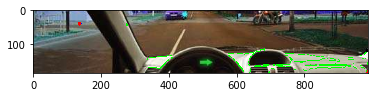

There are no road markings on 9 image


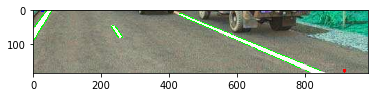

0
There are no road markings on 10 image


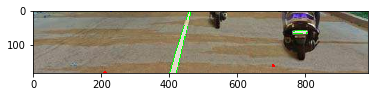

25
There are no road markings on 11 image


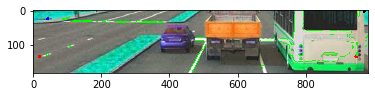

25
There are no road markings on 12 image


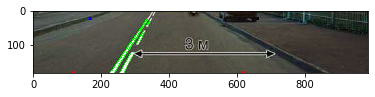

2
There are no road markings on 13 image


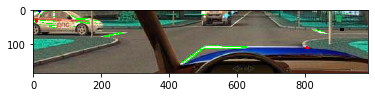

There are no road markings on 14 image


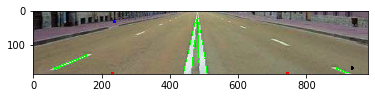

In [72]:
for i in range(len(converted_ims)):
    try:
        show(draw_lines(i, converted_ims, blacks))
        show(cropped[i])
    except:
        print("There are no road markings on",str(i),"image")
        show(cropped[i])

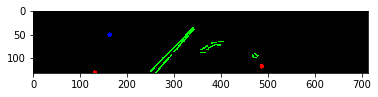

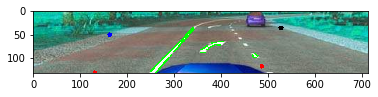

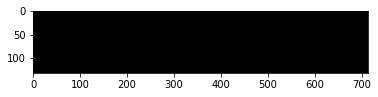

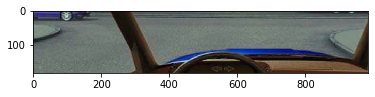

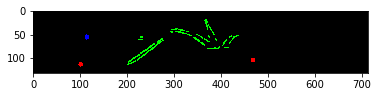

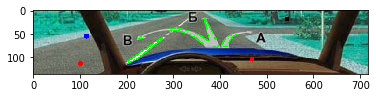

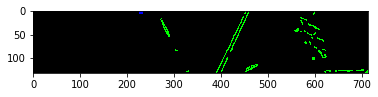

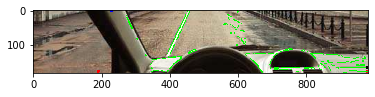

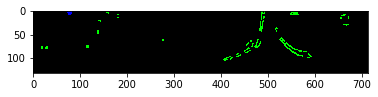

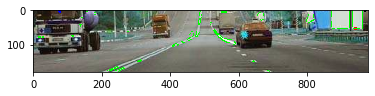

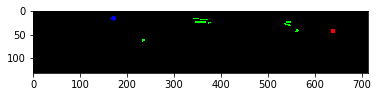

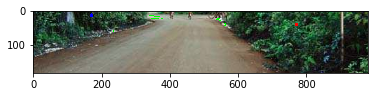

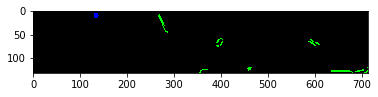

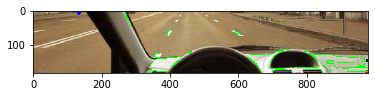

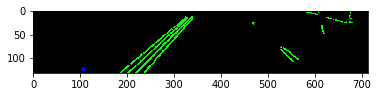

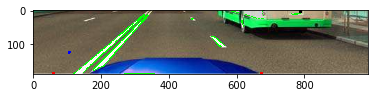

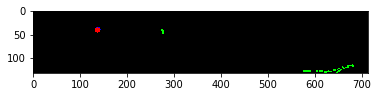

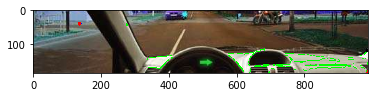

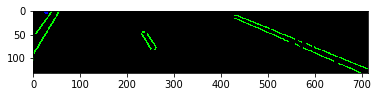

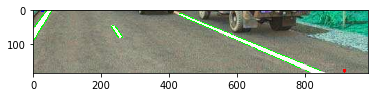

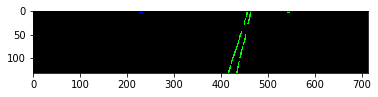

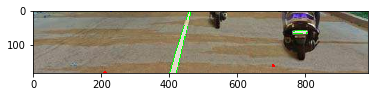

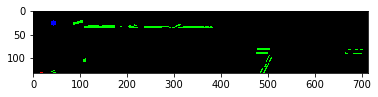

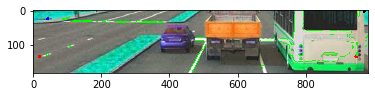

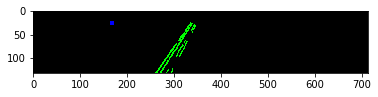

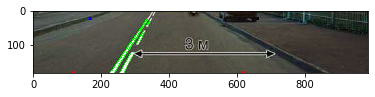

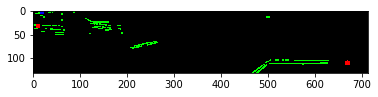

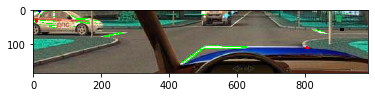

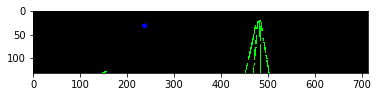

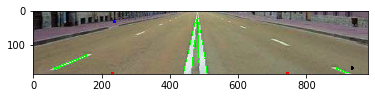

In [73]:
for i in range(len(converted_ims)):
    show(blacks[i])
    show(cropped[i])

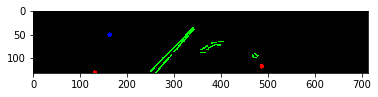

50


In [75]:
img = blacks[0]
show(img)
im, tl,tr,bl,br = draw_lines(0, converted_ims, cropped)

In [76]:
pts1=np.float32([[tl[0],tl[1]], [tr[0],tr[1]], [bl[0],bl[1]], [br[0], br[1]]])

In [77]:
pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])

In [78]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)

In [79]:
result = cv2.warpPerspective(img, matrix, (500, 600))

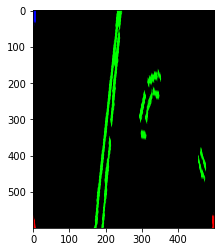

In [80]:
show(result)

## Нарисуем линии Хафа на обработанных изображениях
(чтобы получить координаты этих линий и повернуть их так, как нам надо)

In [182]:
new_blacks = []
for i in range(len(cropped)):
    height, width = cropped[0].shape[:2]
    img = Image.new("RGB", (width, height))
    new_blacks.append(np.int16(img))

In [183]:
def draw_lines_on_black(index, blacks, new_blacks):
    edges = cv2.Canny(blacks[index].astype(np.uint8), 1000, 1000)
    #show(edges)
    height, width = cropped[index].shape[:2]
    print(height, width)
    img = new_blacks[index]
    #minLineLength = 10
    #maxLineGap = 5
    minLineLength = 80
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    print(lines)
    x_min=width
    i_min = 0
    x_max=-1
    i_max = 0
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            '''if x1<x_min:
                x_min = x1
                i_min = x
            if x1>x_max:
                x_max=x1
                i_max = x
            print(x1,y1,x2,y2)'''
            cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    #print(x_min, x_max)
    #print(lines[i_min])
    #print(lines[i_max])

    return img#, lines[i_min], lines[i_max]

0
132 714
[[[273 120 346  36]]]


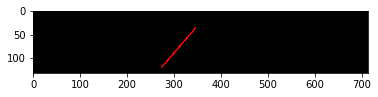

1
183 984
None
no such lines
2
136 717
None
no such lines
3
183 981
None
no such lines
4
180 978
None
no such lines
5
182 981
None
no such lines
6
182 980
None
no such lines
7
187 988
[[[219 128 310  37]]

 [[183 131 332   6]]

 [[239 131 331  29]]

 [[205 131 296  46]]

 [[202 130 305  34]]

 [[188 131 309  29]]

 [[235 130 331  24]]

 [[188 130 308  29]]

 [[211 127 310  35]]

 [[183 130 331   6]]]


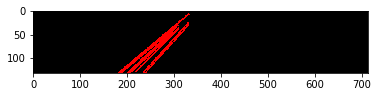

8
185 988
[[[576 127 656 126]]]


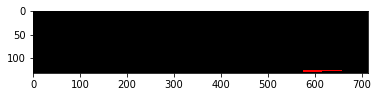

9
185 987
[[[515  51 631 101]]

 [[527  48 713 123]]

 [[527  46 712 120]]

 [[554  70 672 122]]

 [[600  88 700 131]]

 [[490  40 593  84]]

 [[540  64 650 113]]

 [[530  46 626  85]]]


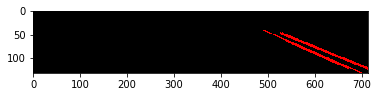

10
183 984
[[[423 109 457   2]]

 [[436 130 465   2]]

 [[413 131 455   1]]]


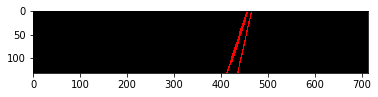

11
183 983
[[[262  36 362  36]]

 [[106  32 209  32]]]


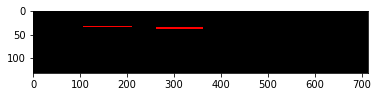

12
183 986
[[[273 131 347  17]]

 [[260 131 342  14]]]


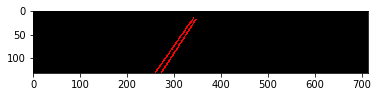

13
184 985
[[[504 102 616 102]]

 [[497 105 641 105]]]


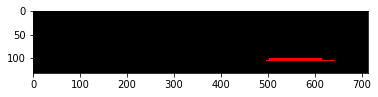

14
184 981
[[[454 130 474  36]]

 [[451 129 472  33]]

 [[484  15 500 127]]

 [[486  13 498  96]]]


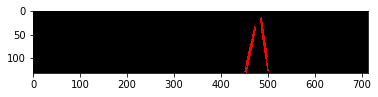

In [184]:
for i in range(len(blacks)):
    print(i)
    try:
        show(draw_lines_on_black(i, blacks, new_blacks))
    except:
        print("no such lines")

In [185]:
img = blacks[0]

In [160]:
cv2.circle(img, (321,     33), 5, (0, 0, 255), -1)
cv2.circle(img, (470,  73), 5, (0, 0, 255), -1)
cv2.circle(img, (245,    127), 5, (0, 0, 255), -1)
cv2.circle(img, (529,  131), 5, (0, 0, 255), -1)
#pts1=np.float32([[470, 206], [1479, 198], [32, 1122], [1980, 1125]])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int16)

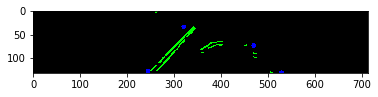

In [161]:
show(img)

In [162]:
pts1=np.float32([[321,33], [470,73], [245, 127], [529, 131]])

In [163]:
pts2 = np.float32([[0, 0], [500, 0], [0, 600], [500, 600]])

In [164]:
matrix = cv2.getPerspectiveTransform(pts1, pts2)

In [165]:
matrix

array([[ 6.62984810e-01,  5.36030272e-01, -2.30507123e+02],
       [-1.45506634e+00,  5.42012212e+00,  2.88212265e+02],
       [-2.36587137e-03,  4.82755397e-03,  1.00000000e+00]])

In [166]:
result = cv2.warpPerspective(img, matrix, (500, 600))

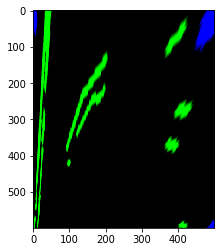

In [167]:
show(result)

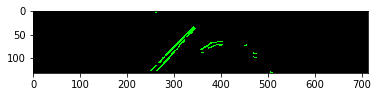

In [159]:
show(img)

In [154]:
src = np.float32([(321,     33),
                  (470,  73),
                  (245,    127),
                  (529,  131)])

dst = np.float32([(0, 0),
                  (500, 0),
                  (0, 600),
                  (500, 600)])


In [155]:
img = blacks[0]
h, w = img.shape[:2]

In [156]:
M = cv2.getPerspectiveTransform(src, dst)

In [157]:
warped = cv2.warpPerspective(img, M, (w, h), flags=cv2.INTER_LINEAR)

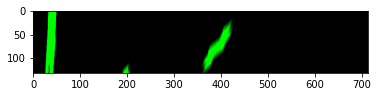

In [158]:
show(warped)

In [48]:
import numpy as np
import cv2
def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
    return rect

In [49]:
def four_point_transform(image, pts):
	# obtain a consistent order of the points and unpack them
	# individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
	# compute the width of the new image, which will be the
	# maximum distance between bottom-right and bottom-left
	# x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
	# compute the height of the new image, which will be the
	# maximum distance between the top-right and bottom-right
	# y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
	# now that we have the dimensions of the new image, construct
	# the set of destination points to obtain a "birds eye view",
	# (i.e. top-down view) of the image, again specifying points
	# in the top-left, top-right, bottom-right, and bottom-left
	# order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
	# compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
	# return the warped image
    return warped

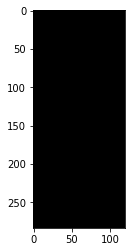

In [103]:
pts = np.array([(33, 321), (73, 470), (131, 529), (127, 245)], dtype = "float32")
show(four_point_transform(blacks[0], pts))

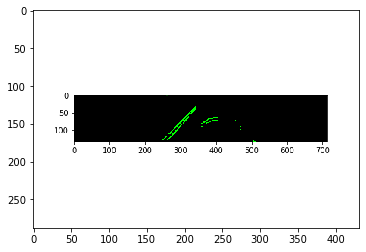

In [111]:
image1 = cv2.imread('array.png')
show(image1)

In [108]:
!pip install Image

     |████████████████████████████████| 7.5 MB 3.7 MB/s eta 0:00:01     |█████████████████▍              | 4.1 MB 3.7 MB/s eta 0:00:01     |█████████████████████▋          | 5.0 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 866 kB/s eta 0:00:01
  Created wheel for Image: filename=image-1.5.31-py2.py3-none-any.whl size=19473 sha256=1418b55e1871d825f79b46f1be42e9403e0dab54866b2164adb02ac1be6f59d3
  Stored in directory: /home/ann/.cache/pip/wheels/5e/9d/fa/ed0c7bcf2687a1f5f797f01334a480f01fafb550405eca8f90
Successfully built Image
You should consider upgrading via the '/home/ann/.pyenv/versions/3.6.6/bin/python3.6 -m pip install --upgrade pip' command.


In [109]:
import numpy as np
import Image

x = blacks[0]
im = Image.fromarray(x)
im.save('test.png')

ModuleNotFoundError: No module named 'Image'

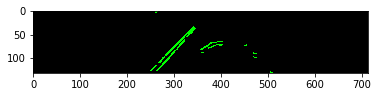

In [86]:
show(blacks[0])

In [82]:
for i in range(132):
    for j in range(714):
        if blacks[0][i][j][1] == 255:
            print(i,j)

0 261
0 262
0 263
0 264
1 260
1 261
1 262
1 263
1 264
1 265
2 260
2 261
2 262
2 263
2 264
2 265
3 261
3 262
3 263
3 264
33 341
33 342
34 340
34 341
34 342
34 343
35 339
35 340
35 341
35 342
35 343
35 344
35 345
36 338
36 339
36 340
36 341
36 342
36 343
36 344
36 345
36 346
37 337
37 338
37 339
37 340
37 341
37 342
37 343
37 344
37 345
37 346
38 336
38 337
38 338
38 339
38 340
38 341
38 342
38 343
38 344
38 345
39 335
39 336
39 337
39 338
39 339
39 340
39 341
39 342
39 343
39 344
40 334
40 335
40 336
40 337
40 338
40 339
40 340
40 341
40 342
40 343
41 333
41 334
41 335
41 336
41 337
41 338
41 339
41 340
41 341
41 342
42 332
42 333
42 334
42 335
42 336
42 337
42 338
42 339
42 340
42 341
43 331
43 332
43 333
43 334
43 335
43 336
43 337
43 338
43 339
43 340
43 341
44 330
44 331
44 332
44 333
44 334
44 335
44 336
44 337
44 338
44 339
44 340
45 329
45 330
45 331
45 332
45 333
45 334
45 335
45 336
45 337
45 338
45 339
46 328
46 329
46 330
46 331
46 332
46 334
46 335
46 336
46 337
46 338
47 32

In [81]:
for im in blacks:
    edges = cv2.Canny(proc(im), 1000, 1000)
    show(edges)

TypeError: 'int' object is not iterable

In [80]:
def draw_lines(index, converted_ims, cropped):
    edges = cv2.Canny(proc(converted_ims[index]), 1000, 1000)
    img = cropped[index]
    #minLineLength = 10
    #maxLineGap = 5
    minLineLength = 3
    maxLineGap = 2
    lines = cv2.HoughLinesP(edges,3,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            if on_line(y1, x1, index, cropped_masks):
                cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

    return img

In [75]:
new_blacks = []
for i in range(len(cropped)):
    height, width = cropped[0].shape[:2]
    img = Image.new("RGB", (width, height))
    new_blacks.append(np.int16(img))

There are no road markings on 0 image


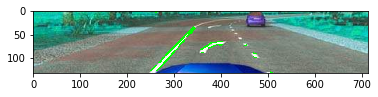

There are no road markings on 1 image


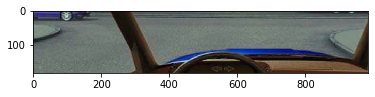

There are no road markings on 2 image


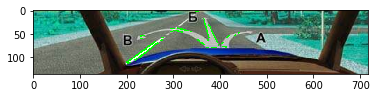

There are no road markings on 3 image


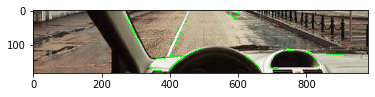

There are no road markings on 4 image


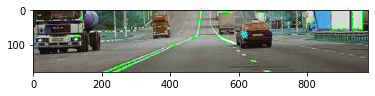

There are no road markings on 5 image


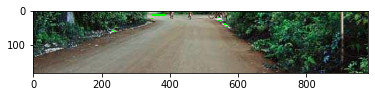

There are no road markings on 6 image


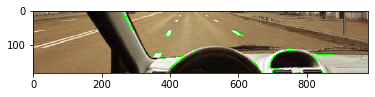

There are no road markings on 7 image


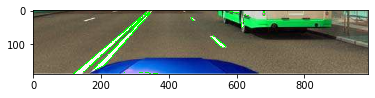

There are no road markings on 8 image


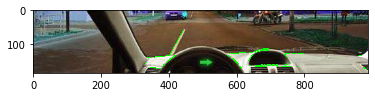

There are no road markings on 9 image


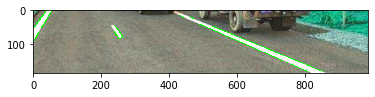

There are no road markings on 10 image


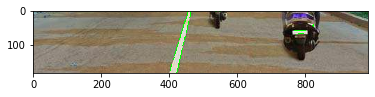

There are no road markings on 11 image


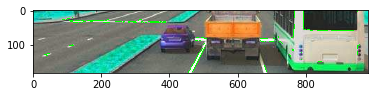

There are no road markings on 12 image


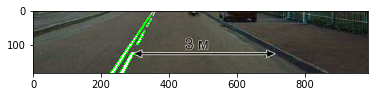

There are no road markings on 13 image


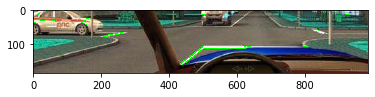

There are no road markings on 14 image


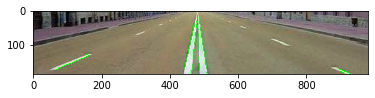

In [77]:
for i in range(len(converted_ims)):
    try:
        show(draw_lines(i, blacks, new_blacks))
        show(new_blacks[i])
    except:
        print("There are no road markings on",str(i),"image")
        show(cropped[i])

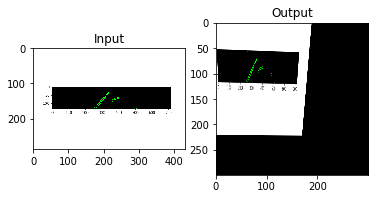

In [127]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('array.png')
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[668,52],[28,387],[800,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()
plt.show()